# **Practical assignment 1**

## Part 1: Fast multiplication.

### Problem 1.1

Run this to install everything needed.

In [1]:
%pip install numpy
%pip install matplotlib
%pip install pandas

Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.
Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.
Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.


In [2]:
import matplotlib.pyplot as plt
import random
import time
import numpy as np
import math
import pandas as pd

The following function multiply an n-digit number on 1-digit number just going through the longer one (O(n)) and multiplying it on the second number. (O(1) cause it can be taken from the multiplication table.

In [16]:
def multiplicate_on_one_number(a, b):
    """Multiplies one - digit number on n-digit number

    Args:
        a (int): first number (n-digit)
        b (int): second number (1-digit)

    Raises:
        ValueError: If input is incorrect

    Returns:
        int: product of a and b
    """
    if len(str(b)) != 1 and len(str(a)) != 1:
        raise ValueError("One of digit should be 1-digit")
    if len(str(a)) == 1 and len(str(b)) != 1:
        a, b = b, a
    result = ""
    a_length = len(str(a))
    to_remember = 0
    for i in range(a_length-1):
        current = a % 10
        a = a // 10
        current = b*current+to_remember
        current_without_rest = current % 10
        result = str(current_without_rest) + result
        to_remember = current // 10
    result = str(a*b+to_remember) + result
    return int(result)



*Example:*

In [17]:
a = 13425654
b = 2
print(multiplicate_on_one_number(a, b) == a*b)
multiplicate_on_one_number(a, b)

True


26851308

This is already our "grade-school multiplication". It goes through each digit in the second number (O(n)) and multiplies its digits. ($O(n)$) So summary it is $O(n^2)$. And after that sums the result in needed method. (We will have $n$ applications, so $n$ sums of $k$ length number = $O(nk)$) So the resulting complexity is $O(n^2)$

In [40]:
def grade_school_multiplication(a, b, flag = False):
    """Grade school multiplication

    Args:
        a (int): first number
        b (int): second number

    Returns:
        int: product of two numbers
    """
    if a<0 and b<0:
        a = int(str(a)[1:])
        b = int(str(b)[1:])
    elif a<0 and b>=0:
        a = int(str(a)[1:])
        flag = True
    elif b<0 and a>=0:
        b = int(str(b)[1:])
        flag = True
    result = 0
    b_length = len(str(b))
    for i in range(b_length):
        product_by_one = multiplicate_on_one_number(int(str(b)[-i-1]), a)
        to_add = int(str(product_by_one) + "0"*i)
        result += to_add
    if flag:
        result = int("-" + str(result))
    return result

Functions for binary add and substract of two numbers $O(n)$:

In [44]:
def binary_add(a, b):
    """Add two binary numbers

    Args:
        a (str): binary number (i.e. "0100101")
        b (str): binary number (i.e. "0100101")

    Returns:
        str: sum of a and b
    """
    max_len = max(len(a), len(b))
    a = a.zfill(max_len)
    b = b.zfill(max_len)
    result = ''
    to_remember = 0
    for i in range(max_len - 1, -1, -1):
        r = to_remember
        r += 1 if a[i] == '1' else 0
        r += 1 if b[i] == '1' else 0
        result = ('1' if r % 2 == 1 else '0') + result
        to_remember = 0 if r < 2 else 1
    if to_remember != 0:
        result = '1' + result
    return result

*Example:*

In [48]:
a = "10101001"
b = "00010011"
binary_add(a, b)

'10111100'

In [49]:
def binary_substract(a, b):
    """Substraction of two binary numbers

    Args:
        a (str): binary number (i.e. "0100101")
        b (str): binary number (i.e. "0100101")

    Returns:
        str: difference of a and b
    """
    max_len = max(len(a), len(b))
    a = a.zfill(max_len)
    b = b.zfill(max_len)
    result = ''
    to_remember = 0
    flag = False
    for i in range(max_len - 1, -1, -1):
        if to_remember == 1 and a[i] == "1":
            a = a[:i] + "0" + a[i+1:]
        elif to_remember == 1 and a[i] == "0":
            a = a[:i] + "1" + a[i+1:]
            to_remember = 2
        current_res = "0" if a[i] == b[i] else "1"
        result = current_res + result
        if to_remember == 2:
            to_remember = 1
            continue
        to_remember = 1 if (current_res == "1" and a[i] == "0") else 0
    
    return result

*Example:*

In [50]:
binary_substract(a, b)

'10010110'

Karatsuba algorithm for multiplying numbers. Works closely to $O(n^2)$.

It reduces the multiplication of two n-digit numbers to three multiplications of $\frac{n}{2}$ - digit numbers. So using Master Theorem its complexity is $O(n^{\log_{2}3}) ≈ O(n^{1.58})$ 

In [51]:
def karatsuba(x, y):
    """Karatsuba algorithm for multiplying numbers. 

    Args:
        x (int): first number
        y (int): second number

    Returns:
        int: product of two numbers.
    """
    if x < 10 or y < 10:
        return x*y
    else:
        max_len = max(len(str(x)), len(str(y)))
        power = int(math.ceil(max_len / 2))
        
        a = x // 10**power
        b = x % 10**power
        c = y // 10**power
        d = y % 10**power

        ac = karatsuba(a, c)
        bd = karatsuba(b, d)
        ab_cd = karatsuba(a+b,c+d)
        ad_plus_bc = ab_cd - ac - bd

        prod = ac * 10**(power*2) + (ad_plus_bc* 10**power) + bd

        return prod

3. Derive theoretical time complexities\
    a) In grade-school multiplication we have to go through each bit in both numbers. Firslty we multiply each digit in number B on the whole value A. this will be $O(n*m)$. So its time complexity is $O(n^2)$.\
    \
    b) Karatsuba method uses divide and conquire paradigm that reduces the multiplication of two n-digit numbers to three multiplications of n/2-digit numbers. \
    $T(n)=3*T(\frac{n}{2})+O(n).$
    Using Master theorem we can compute time complexity which is equal to $O({n^{\log_{2}3} ≈ n^{1.58}})$

Here you can see graphs which visualise time complexity of the algorithms. (Red line shows us $O(n^2)$). So the straighter the other line is, the closer it is to expected complexity.

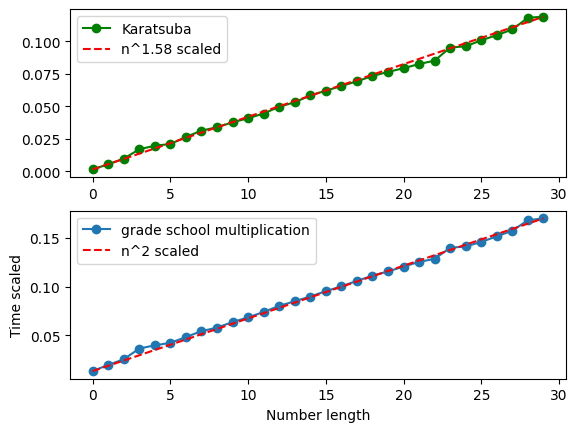

In [61]:
def time_complexity_check():
    """Draw graphs to check time complexity for grade_school multiplication and Karatsuba method in dependency of length of the number."""
    lengths = [i for i in range(30)]
    time_grade_school = []
    time_karatsuba = []
    for length in lengths:
        sum_result_grade = 0
        sum_result_karatsuba = 0
        for number_tests in range(500):
            number_a = random.randint(10**length, 10**(length+1)-1)
            number_b = random.randint(10**length, 10**(length+1) - 1)
            begin = time.time()
            grade_school_multiplication(number_a, number_b)
            end = time.time()
            sum_result_grade += (end-begin)
            
            begin = time.time()
            karatsuba(number_a, number_b)
            end = time.time()
            sum_result_karatsuba += (end-begin)
        time_grade_school.append((sum_result_grade / 10)**(1/2))
        time_karatsuba.append((sum_result_karatsuba / 10)**(1/1.58))

    fig, (ax1, ax2) = plt.subplots(2)

    ax1.plot(lengths, time_karatsuba, label = "Karatsuba", marker = "o", color = "g")
    ax1.plot([lengths[0], lengths[-1]], [time_karatsuba[0], time_karatsuba[-1]], '--r', label='n^1.58 scaled')

    ax2.plot(lengths, time_grade_school, label = "grade school multiplication", marker = "o")
    ax2.plot([lengths[0], lengths[-1]], [time_grade_school[0], time_grade_school[-1]], '--r', label='n^2 scaled')

    plt.xlabel("Number length")
    plt.ylabel("Time scaled")

    ax1.legend()
    ax2.legend()

    plt.show()


time_complexity_check()


On the graph below we can see what was the time for the numbers, which length are 50. It looks like it depends very strong. But in fact the time changes only in 0.0003 in grade scchool multiplication. And not more than 0.00004 seconds in Karatsuba method. (It is impossible to show what numbers where used, they're too big, so are shown just like a black line)

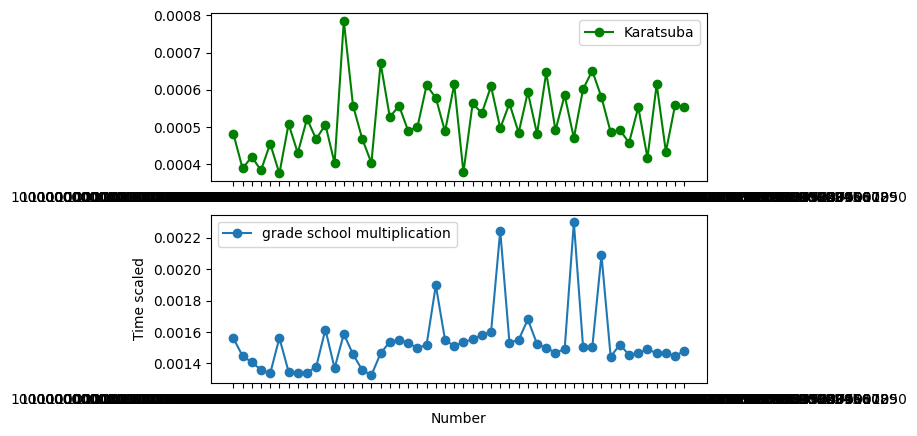

In [63]:
def time_complexity_check():
    """Draw graphs of time complexity for grade school multiplication and Karatsuba for fixed length of numbers."""
    length = 50
    lengths = []
    time_grade_school = []
    time_karatsuba = []
    number_a = 1*(10**length)
    number_b = 1*(10**length)
    for i in range(50):
        number_a = number_a + 19327500021
        number_b = number_b + 19327500021
        if len(str(number_a)) > length+1:
            break
        lengths.append((str(number_a)))
        begin = time.time()
        grade_school_multiplication(number_a, number_b)
        end = time.time()
        time_grade_school.append((end-begin))
        
        begin = time.time()
        karatsuba(number_a, number_b)
        end = time.time()
        time_karatsuba.append(((end - begin)))

    fig, (ax1, ax2) = plt.subplots(2)

    ax1.plot(lengths, time_karatsuba, label = "Karatsuba", marker = "o", color = "g")
    # ax1.plot([lengths[0], lengths[-1]], [time_karatsuba[0], time_karatsuba[-1]], '--r', label='n^1.58 scaled')

    ax2.plot(lengths, time_grade_school, label = "grade school multiplication", marker = "o")
    # ax2.plot([lengths[0], lengths[-1]], [time_grade_school[0], time_grade_school[-1]], '--r', label='n^2 scaled')

    plt.xlabel("Number")
    plt.ylabel("Time scaled")

    ax1.legend()
    ax2.legend()

    plt.show()


time_complexity_check()


### Problem 1.2

In this problem we have to multiply matrix in two ways:\
Trivial method - $O(n^3)$\
Strassen method - $O(n^{\log_{2}7}) ≈ O(n^{2.807})$

The following function align matrix when their size is not $2^i * 2^i$

In [55]:
def matrix_align(m):
    """Aligns matrix to needed size (2^i)

    Args:
        m (list): matrix
    """
    nearest_power = 0
    size_matrix = len(m)
    while size_matrix > 2**nearest_power:
        nearest_power += 1
    matrix_new_size = 2**nearest_power
    for _ in range(matrix_new_size - size_matrix):
        m.append([0 for _ in range(len(m[0]))])
    rows_differ = len(m) - len(m[0])
    if rows_differ > 0:
        for _ in range(rows_differ):
            for j in m:
                j.append(0)
    elif rows_differ < 0:
        for _ in range(-1*rows_differ):
            m.append([0 for _ in range(len(m[0]))])
    

Trivial matrix multiplying algorithm:

In [56]:
def trivial_matrix(m1, m2):
    """Multiply matrices in trivial way

    Args:
        m1 (list): matrix 1
        m2 (list): matrix 2

    Returns:
        list: product of metrices (also matrix)
    """
    result = list([[0 for _ in range(len(m2[1]))] for j in range(len(m1))])
    for i in range(len(m1)):
        for j in range(len(m2[0])):
            for k in range(len(m2)):
                result[i][j] += m1[i][k] * m2[k][j]
    return result

Helping functions to add and substract matrix:

In [57]:
def add_matrix(m1, m2):
    """Adds two matrices

    Args:
        m1 (list): matrix 1
        m2 (list): matrix 2

    Returns:
        list: sum of matrices (also matrix)
    """
    final_matrix = [[0 for _ in range(len(m1[0]))] for _ in range(len(m1))]
    for i in range(len(m1)):
        for j in range(len(m1[i])):
            final_matrix[i][j] = m1[i][j] + m2[i][j]
    return final_matrix
def substract_matrix(m1, m2):
    """Substract two matrices

    Args:
        m1 (list): matrix 1
        m2 (list): matrix 2

    Returns:
        list: difference of matrices (also matrix)
    """
    final_matrix = [[0 for _ in range(len(m1[0]))] for _ in range(len(m1))]
    for i in range(len(m1)):
        for j in range(len(m1[i])):
            final_matrix[i][j] = m1[i][j] - m2[i][j]
    return final_matrix
def matrix_clear_extra(m, size):
    """Clears extra 0-es (which were added for strassen multiplication)

    Args:
        m (list): matrix
        size (tuple): sizes which should.

    Returns:
        list: clear matrix
    """
    new_matrix = []
    for i in range(size[0]):
        new_matrix.append([])
        for j in range(size[1]):
            new_matrix[i].append(m[i][j])
    return new_matrix
def concatenate_matrix(a, b, c, d):
    """Concatenates 4 matrices (we should have this:
    [[a], [b],
     [c], [d]]
     as one matrix)

    Args:
        a (list): matrix 1
        b (list): matrix 2
        c (list): matrix 3
        d (list): matrix 4

    Returns:
        list: concatenated matrix
    """
    new_matrix = []
    for i in range(len(a)):
        new_matrix.append(a[i] + b[i])
    for i in range(len(c)):
        new_matrix.append(c[i]+d[i])
    return new_matrix

Strassen alorithm, which is used to multiply matrix. Time complexity for which is $O(n^3)$

In [58]:
def strassen(m1, m2):
    """Strassen multiplication of matrices

    Args:
        m1 (list): matrix 1
        m2 (list): matrix 2
    """
    def strassen_recursive(m1, m2):
        matrix_align(m1)
        matrix_align(m2)

        if len(m1) == 2 and len(m2) == 2:
            s1 = m2[0][1] - m2[1][1]
            s2 = m1[0][0] + m1[0][1]
            s3 = m1[1][0] + m1[1][1]
            s4 = m2[1][0] - m2[0][0]
            s5 = m1[0][0] + m1[1][1]
            s6 = m2[0][0] + m2[1][1]
            s7 = m1[0][1] - m1[1][1]
            s8 = m2[1][0] + m2[1][1]
            s9 = m1[0][0] - m1[1][0]
            s10 = m2[0][0] + m2[0][1]

            p1 = m1[0][0] * s1
            p2 = s2 * m2[1][1]
            p3 = s3 * m2[0][0]
            p4 = m1[1][1] * s4
            p5 = s5 * s6
            p6 = s7 * s8
            p7 = s9 * s10

            c00 = p5 + p4 - p2 + p6
            c01 = p1 + p2
            c10 = p3 + p4
            c11 = p5 + p1 - p3 - p7

            return [[c00, c01], [c10, c11]]
        else:
            a1 = m1[0:len(m1)//2]
            a11 = [[0 for _ in range(len(a1[0]) // 2)] for _ in range(len(a1))]
            a12 = [[0 for _ in range(len(a1[0]) // 2)] for _ in range(len(a1))]
            for idx, i in enumerate(a1):
                for j in range(len(i) // 2):
                    a11[idx][j] = i[j]
            for idx, i in enumerate(a1):
                for j in range(len(i) // 2, len(i)):
                    a12[idx][len(i) // 2 - j] = i[j]
            a2 = m1[len(m1)//2:]
            a21 = [[0 for _ in range(len(a2[0]) // 2)] for _ in range(len(a2))]
            a22 = [[0 for _ in range(len(a2[0]) // 2)] for _ in range(len(a2))]
            for idx, i in enumerate(a2):
                for j in range(len(i) // 2):
                    a21[idx][j] = i[j]
            for idx, i in enumerate(a2):
                for j in range(len(i) // 2, len(i)):
                    a22[idx][len(i) // 2 - j] = i[j]

            b1 = m2[0:len(m2) // 2]
            b11 = [[0 for _ in range(len(b1[0]) // 2)] for _ in range(len(b1))]
            b12 = [[0 for _ in range(len(b1[0]) // 2)] for _ in range(len(b1))]
            for idx, i in enumerate(b1):
                for j in range(len(i) // 2):
                    b11[idx][j] = i[j]
            for idx, i in enumerate(b1):
                for j in range(len(i) // 2, len(i)):
                    b12[idx][len(i) // 2 - j] = i[j]

            b2 = m2[len(m2) // 2:]
            b21 = [[0 for _ in range(len(b2[0]) // 2)] for _ in range(len(b2))]
            b22 = [[0 for _ in range(len(b2[0]) // 2)] for _ in range(len(b2))]
            for idx, i in enumerate(b2):
                for j in range(len(i) // 2):
                    b21[idx][j] = i[j]
            for idx, i in enumerate(b2):
                for j in range(len(i) // 2, len(i)):
                    b22[idx][len(i) // 2 - j] = i[j]

            s1 = substract_matrix(b12, b22)
            s2 = add_matrix(a11, a12)
            s3 = add_matrix(a21, a22)
            s4 = substract_matrix(b21, b11)
            s5 = add_matrix(a11, a22)
            s6 = add_matrix(b11, b22)
            s7 = substract_matrix(a12, a22)
            s8 = add_matrix(b21, b22)
            s9 = substract_matrix(a11, a21)
            s10 = add_matrix(b11, b12)

            p1 = strassen_recursive(a11, s1)
            p2 = strassen_recursive(s2, b22)
            p3 = strassen_recursive(s3, b11)
            p4 = strassen_recursive(a22, s4)
            p5 = strassen_recursive(s5, s6)
            p6 = strassen_recursive(s7, s8)
            p7 = strassen_recursive(s9, s10)

            c11 = add_matrix(substract_matrix(add_matrix(p5, p4), p2), p6)
            c12 = add_matrix(p1, p2)
            c21 = add_matrix(p3, p4)
            c22 = substract_matrix(substract_matrix(add_matrix(p5, p1), p3), p7)
            matrix = concatenate_matrix(c11, c12, c21, c22)
            return matrix
    size_n = len(m1)
    size_k = len(m2[0])
    matrix = strassen_recursive(m1, m2)
    matrix = matrix_clear_extra(matrix,(size_n, size_k))
    return matrix

In [59]:
matrix1 = [[0, 10, 68, 80, 76], [90, 24, 15, 19, 74], [81, 24, 76, 31, 75], [70, 92, 36, 81, 62], [52, 59, 61, 73, 74]]
matrix2 = [[61, 22, 12, 4, 75], [26, 22, 84, 42, 15], [76, 41, 61, 87, 81], [0, 34, 57, 36, 28], [62, 92, 29, 13, 55]]
strassen(matrix1, matrix2)

[[10140, 12720, 11752, 10204, 12078],
 [11842, 10577, 7240, 4319, 12927],
 [15991, 13380, 11566, 10035, 17584],
 [13242, 13498, 17179, 10998, 15224],
 [13930, 14233, 15608, 11583, 15840]]

In [64]:
def time_complexity_check(lengths):
    """Checks time complexity for trivial matrices multiplication and Strassen algorithm.

    Args:
        lengths (list): length of matrices.
    """
    time_trivial = []
    time_strassen = []
    for length in lengths:
            rand_numb1 = length
            rand_numb2 = length

            matrix1 = np.random.rand(length, length).tolist()
            matrix2 = np.random.rand(length, length).tolist()

            begin = time.time()
            trivial_matrix(matrix1, matrix2)
            end = time.time()
            time_trivial.append((end-begin)**(1/3))
            
            begin = time.time()
            strassen(matrix1, matrix2)
            end = time.time()
            time_strassen.append((end-begin)**(1/2.81))

        # time_grade_school.append((sum_result_grade / 10)**(1/2))
        # time_karatsuba.append((sum_result_karatsuba / 10)**(1/1.58))

    fig, (ax1, ax2) = plt.subplots(2)

    ax1.plot(lengths, time_strassen, label = "Strassen", marker = "o", color = "g")
    ax1.plot([lengths[0], lengths[-1]], [time_strassen[0], time_strassen[-1]], '--r', label='n^2.81 scaled')

    ax2.plot(lengths, time_trivial, label = "Trivial multiplication", marker = "o")
    ax2.plot([lengths[0], lengths[-1]], [time_trivial[0], time_trivial[-1]], '--r', label='n^3 scaled')

    plt.xlabel("Number length")
    plt.ylabel("Time scaled")

    ax1.legend()
    ax2.legend()

    plt.show()




Here you can see the graph for matrix which size is only $2^i$. 

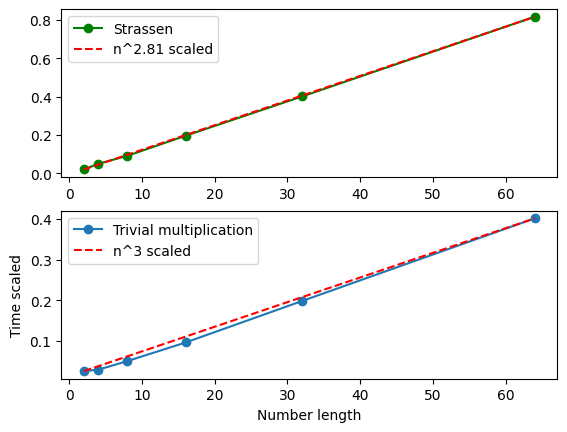

In [67]:
lengths = [2**i for i in range(1, 7)]
time_complexity_check(lengths)

Whereas here we can see all the meanings from $2*2$ to $100*100$. (squared only)\
We can see that Trivial multiplication is going perfectly, whereas in Strassen algorithm we see something like stairs. It is happening because for each matrix Strassen's algorithm should "align" the matrix to size $2^i * 2^i$. So that, for matrix from $2^{i-1} * 2^{i-1}$ to $2^{i} * 2^{i}$ the time which is taken will be approximately the same.

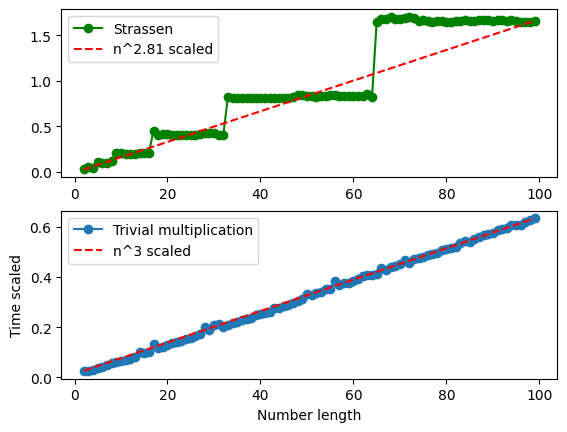

In [68]:
lengths = [i for i in range(2, 100)]
time_complexity_check(lengths)


3. Derive theoretical time complexities:
    a) Trivial matrix multiplication. For this method for each element (they're $n$) to find we need $n^2$ operations. So time complexity for this will be $O(n^3)$.
    b) Strassen algo. In this $T(n)=7T(\frac{n}{2})+O(n^2).$\
    Master theorem $=> O(n^{\log_{2}{7}})$

Below we can see the graph which shows us dependency beetween the length of the value in the random matrix. We can say that it is not so dependent. It all takes different times, but the difference is less than 0.01 second.

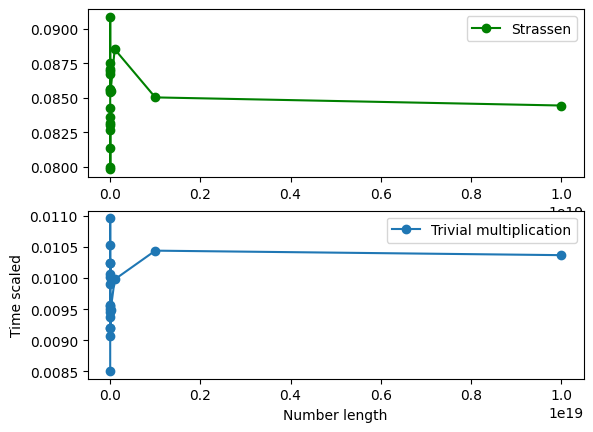

In [88]:
def check_inside_values_time():
    """checks whether algorithm are dependent from the lengths of values inside the matrices."""
    length = 32
    length_of_each_number = 0
    time_trivial = []
    time_strassen = []
    meanings = []
    rand_numb1 = length
    rand_numb2 = length
    for i in range(20):
        matrix1_old = np.random.rand(length, length).tolist()
        matrix2_old = np.random.rand(length, length).tolist()
        matrix1 = []
        matrix2 = []
        for j in range(len(matrix1_old)):
            matrix1.append([])
            matrix2.append([])
            for k in range(len(matrix1_old[i])):
                matrix1[j].append(int(matrix1_old[j][k]*(10**(i+1))))
                matrix2[j].append(int(matrix2_old[j][k]*(10**(i+1))))

        meanings.append(10**i)
        begin = time.time()
        trivial_matrix(matrix1, matrix2)
        end = time.time()
        time_trivial.append((end-begin))

        begin = time.time()
        strassen(matrix1, matrix2)
        end = time.time()
        time_strassen.append((end-begin))

    # matrix_1 = [[0 for _ in range(length)] for _ in range(length)]
    # matrix_2 = [[0 for _ in range(length)] for _ in range(length)]
    # begin = time.time()
    # trivial_matrix(matrix1, matrix2)
    # end = time.time()
    # time_trivial.append((end-begin))
    # meanings.append(0)
    

    # matrix1 = [[9999999999 for _ in range(length)] for _ in range(length)]
    # matrix2 = [[9999999999 for _ in range(length)] for _ in range(length)]
    # # meanings.append(9999999999)
    # begin = time.time()
    # strassen(matrix1, matrix2)
    # end = time.time()
    # time_strassen.append((end-begin))
    # meanings.append(0)



        # time_grade_school.append((sum_result_grade / 10)**(1/2))
        # time_karatsuba.append((sum_result_karatsuba / 10)**(1/1.58))

    fig, (ax1, ax2) = plt.subplots(2)

    ax1.plot(meanings, time_strassen, label = "Strassen", marker = "o", color = "g")
    # ax1.plot([lengths[0], lengths[-1]], [time_strassen[0], time_strassen[-1]], '--r', label='n^2.81 scaled')

    ax2.plot(meanings, time_trivial, label = "Trivial multiplication", marker = "o")
    # ax2.plot([lengths[0], lengths[-1]], [time_trivial[0], time_trivial[-1]], '--r', label='n^3 scaled')

    plt.xlabel("Number length")
    plt.ylabel("Time scaled")

    ax1.legend()
    ax2.legend()

    plt.show()

check_inside_values_time()


## PART 2: Randomized algorithms. 

### Problem 2.1


In this task we have to implement some QuickSort algos. (QuickSort determined, QuickSort randomized, and some more functions which uses QuickSelect algo.)

In [89]:
def partition(array, left, right):
	"""Standart quickselect partitioning

	Args:
		array (list): list of values
		left (int): index of left edge
		right (int): index of right edge

	Returns:
		int: index of pivot (after it has been replaced)
	"""
	x = array[right]
	i = left
	for j in range(left, right):
		if array[j] <= x:
			array[i], array[j] = array[j], array[i]
			i += 1
	array[i], array[right] = array[right], array[i]
	return i

def partition_with_given_index(array, left, right, index):
	"""Partitioning with taking as the pivot not the last value in array, but some special

	Args:
		array (list): list of values
		left (int): index of left edge
		right (int): index of right edge
		index (int): index of pivot

	Returns:
		int: index of pivot (after it has been replaced)
	"""
	x = array[index]
	i = left
	for j in range(left, right):
		if array[j] <= x:
			array[i], array[j] = array[j], array[i]
			i += 1
	array[i], array[right] = array[right], array[i]
	return i

In [90]:
def randomized_partition(array, left, right):
	"""Partitioning after taking pivot as the random element in the array

	Args:
		array (list): list of values
		left (int): index of left edge
		right (int): index of right edge

	Returns:
		int: index of pivot (after it has been replaced)
	"""
	random_index = random.randint(left, right)
	array[right], array[random_index] = array[random_index], array[right]
	return partition(array, left, right)

k-th smallest (and min, max):

In [91]:
def kthSmallest(array, left, right, k):
    """Find kth smallest element in array

    Args:
		array (list): list of values
		left (int): index of left edge
		right (int): index of right edge
        k (int): number of smallest elem. (K - th)

    Returns:
        int: value of the k-th smallest element
    """
    if (k > 0 and k <= right - left + 1):
        index = partition(array, left, right)
        if (index - left == k - 1):
            return array[index]
        if (index - left > k - 1):
            return kthSmallest(array, left, index - 1, k)
        return kthSmallest(array, index + 1, right, 
                            k - index + left - 1)
    return "Index out of bound"


def kthSmallest_with_given_index(array, left, right, k, index):
    """Find kth smallest element in array with given pivot

    Args:
		array (list): list of values
		left (int): index of left edge
		right (int): index of right edge
        k (int): number of smallest elem. (K - th)
        index (int): index for pivot

    Returns:
        int: value of the k-th smallest element
    """
    if (k > 0 and k <= right - left + 1):
        index = partition(array, left, right, index)
        if (index - left == k - 1):
            return array[index]
        if (index - left > k - 1):
            return kthSmallest(array, left, index - 1, k)
        return kthSmallest(array, index + 1, right, 
                            k - index + left - 1)
    return "Index out of bound"

In [92]:
def smallest(array, left, right):
	"""Finds smallest element in the array

	Args:
		array (list): array of elements
		left (int): index of left edge
		right (int): index of right edge

	Returns:
		int: value of smallest element
	"""
	return kthSmallest(array, left, right, 0)

In [93]:
def biggest(array, left, right):
	"""Finds biggest element in the array

	Args:
		array (list): array of elements
		left (int): index of left edge
		right (int): index of right edge

	Returns:
		int: value of biggest element
	"""
	return kthSmallest(array, left, right, len(array) - 1)
	

In [94]:
def randomized_kthSmallest(array, left, right, k):
    """Finds smallest element in the array using randomized pivot

	Args:
		array (list): array of elements
		left (int): index of left edge
		right (int): index of right edge

	Returns:
		int: value of smallest element
	"""
    if (k > 0 and k <= right - left + 1):
        index = randomized_partition(array, left, right)
        if (index - left == k - 1):
            return array[index]
        if (index - left > k - 1):
            return randomized_kthSmallest(array, left, index - 1, k)
        return randomized_kthSmallest(array, index + 1, right, 
                            k - index + left - 1)
    return "Index out of bound"


In [95]:
def median(array, left, right):
    """Finds median in the array

	Args:
		array (list): array of elements
		left (int): index of left edge
		right (int): index of right edge

	Returns:
		int: value of median element
	"""
    if len(array)%2 == 0:
        first = kthSmallest(array, left, right, len(array)//2)
        second = array[len(array)//2]
        return (first + second) / 2
        
    return kthSmallest(array, left, right, len(array)//2 + 1)

In [96]:
def randomized_median(array, left, right):
    """Finds median in the array using randomly choosed pivot

	Args:
		array (list): array of elements
		left (int): index of left edge
		right (int): index of right edge

	Returns:
		int: value of median element
	"""
    if len(array)%2 == 0:
        first = randomized_kthSmallest(array, left, right, len(array)//2)
        second = array[len(array)//2]
        return (first + second) / 2
        
    return randomized_kthSmallest(array, left, right, len(array)//2 + 1)

3.a The best case $O(n)$ - will be when the algorithm chooses the k-th smallest element on the first iteration. As a result, the algorithm does $O(n)$ during 1st and last step, after that it returns pivot and this is the end.\
\
The worst case $(O(n^2))$ - will be when our array is sorted (or reversed sorted). Then our pivot is chosen as last element, so then ```partition``` will divide it to two subarrays which are $n$ and $n-1$.\
$T_n = O(n) + T_{n-1} = O(n) + O(n-1) + ... + O(1) = O(\frac{n(n-1)}{2}) = O(n^2)$

3.b **Expected number of comparisons to find max and min value: $E(X) = E(\sum_{i=0}^{n-1} X_i = n)$\
To find a median in average case we need at most $4n$ comparisons.\
$c_{n,k} and E[Q(k)]$ expected number of comparisons (parameter $k$), and the probability to choose the pivot $P = p = {\frac{1}{n}}$, so: \

$c_{n, k}$ = $E[Q(k)]$ = $n$ - 1 + $([\sum_{p=1}^{k-1}E[Q_{right}(k-p)|P=p]$ + $[\sum_{p=k-1}^{n-1}E[Q_{left}(k)|P=p])⋅P(P=p)$ =

 $n$ - 1 + $\frac{1}{n}$ $⋅(\sum_{p=1}^{k-1}c_{n-p, k-p} + \sum_{p=k-1}^{n-1}c_{p, k})$ $\le$ $n$ - 1 + $\frac{1}{n}$ $⋅(\sum_{p=1}^{k-1}4⋅(n-p) + \sum_{p=k-1}^{n-1}4\cdot p)$ =
 
  $n - 1 + \frac{4}{n} ⋅ (n \cdot (n-1) - \frac{(n-k)(n-k+1)}{2} - \frac{k \cdot (k+1)}{2}) \le n - 1 + \frac{4}{n} \cdot (n \cdot (n-1) - \frac{n^2}{4})$ =
  
   $n - 1 + 4 \cdot (n-1) - n \le 4 \cdot n$

In [97]:
def check_for_different_values():
        """Shows what time was taken for different arrays using different algorithms

        Returns:
            pd.DataFrame: table with information about time taken
        """
        sorted_array = [i for i in range(100)]
        reversed_sorted_array = [100 - i for i in range(100)]
        random_array = [random.randint(0, 100) for _ in range(100)]
        sorted_array_time = []
        reversed_sorted_array_time = []
        random_array_time = []
        lst1 = [sorted_array, reversed_sorted_array, random_array]
        lst = [sorted_array_time, reversed_sorted_array_time, random_array_time]
        for i in range(3):
                begin = time.time()
                kthSmallest(lst1[i], 0, len(lst1[i]) - 1, 3)
                end = time.time()
                lst[i].append(end-begin)

                begin = time.time()
                randomized_kthSmallest(lst1[i], 0, len(lst1[i]) - 1, 3)
                end = time.time()
                lst[i].append(end-begin)

                begin = time.time()
                median(lst1[i], 0, len(lst1[i]) - 1)
                end = time.time()
                lst[i].append(end - begin)

                begin = time.time()
                randomized_median(lst1[i], 0, len(lst1[i]) - 1)
                end = time.time()
                lst[i].append(end-begin)
        

        df=pd.DataFrame({"Sorted array":lst[0],
                        "Reversed sorted array":lst[1], "Random array": lst[2]})

        df.index = ["k-th Smallest", "Randomized k-th Smallest", "Median", "Randomized media"]
        return df


check_for_different_values()

,Sorted array,Reversed sorted array,Random array
k-th Smallest,0.001728,0.000107,0.000036
Randomized k-th Smallest,0.000152,0.000069,0.000061
Median,0.001245,0.000231,0.000089
Randomized media,0.000080,0.000100,0.000141


On the next graph you can see how k-th smallest works for different given data. So we can see sorted array, what is worst case. And random array which should work for $O(nlog(n))$ in average.

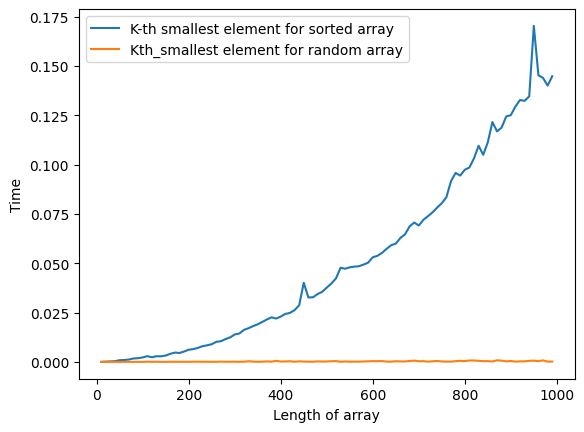

In [103]:
def plot_kth_smallest():
    length_sorted = []
    length_random = []
    time_kth = []
    time_kth_random = []
    for i in range(1, 100):
        sorted_arr = [i for i in range(i*10)]
        random_arr = [random.randint(0, 10000) for _ in range(i*10)]
        len_arr = len(sorted_arr)
        length_sorted.append(len_arr)
        length_random.append(len(random_arr))
        begin = time.time()
        kthSmallest(sorted_arr, 0, len_arr - 1, 3)
        end = time.time()
        time_kth.append(end - begin)
        begin = time.time()
        kthSmallest(random_arr, 0, len(random_arr) - 1, 3)
        end = time.time()
        time_kth_random.append(end - begin)
    plt.plot(length_random, time_kth, label = "K-th smallest element for sorted array")
    plt.plot(length_random, time_kth_random, label="Kth_smallest element for random array")
    plt.xlabel("Length of array")
    plt.ylabel("Time")
    plt.legend()
    plt.show()
plot_kth_smallest()

On the next graph we can see how randomized k smallest works. We can see that time of random sorted array and sorted array are very close. And thay both works very fast. The biggest time which was taken is 0.1 seconds.

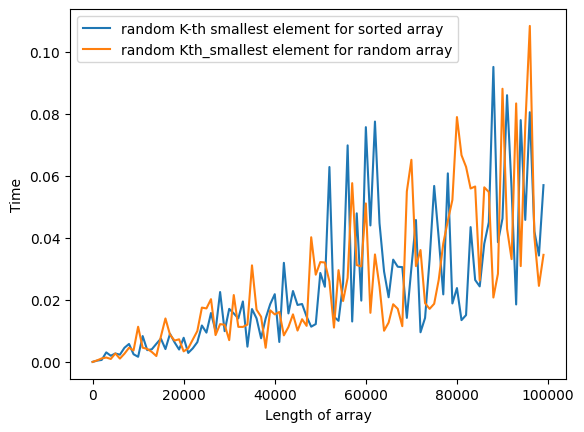

In [112]:
def random_kth_smallest_plot():
    length_sorted = []
    length_random = []
    time_kth = []
    time_kth_random = []
    for i in range(1, 10000, 100):
        sorted_arr = [i for i in range(i*10)]
        random_arr = [random.randint(0, 10000) for _ in range(i*10)]
        len_arr = len(sorted_arr)
        length_sorted.append(len_arr)
        length_random.append(len(random_arr))
        begin = time.time()
        randomized_kthSmallest(sorted_arr, 0, len_arr - 1, 3)
        end = time.time()
        time_kth.append(end - begin)
        begin = time.time()
        randomized_kthSmallest(random_arr, 0, len(random_arr) - 1, 3)
        end = time.time()
        time_kth_random.append(end - begin)
    plt.plot(length_random, time_kth, label = "random K-th smallest element for sorted array")
    plt.plot(length_random, time_kth_random, label="random Kth_smallest element for random array")
    plt.xlabel("Length of array")
    plt.ylabel("Time")
    plt.legend()
    plt.show()
random_kth_smallest_plot()

Here you can see these for lines on one graph to see the difference. As we can see using random algo both green lines are very close to each other, whereas not random k-th smallest looks very ineffective.

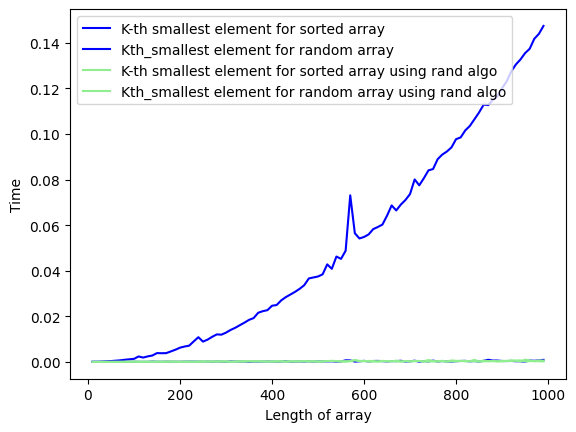

In [114]:
def comaprison_k_k_random():
    length_sorted = []
    length_random = []
    time_kth = []
    time_kth_random = []
    time_kth_for_random = []
    time_kth_rand_algo_rand_arr = []
    for i in range(1, 100):
        sorted_arr = [i for i in range(i*10)]
        random_arr = [random.randint(0, 10000) for _ in range(i*10)]
        len_arr = len(sorted_arr)
        length_sorted.append(len_arr)
        length_random.append(len(random_arr))
        begin = time.time()
        kthSmallest(sorted_arr, 0, len_arr - 1, 3)
        end = time.time()
        time_kth.append(end - begin)
        begin = time.time()
        kthSmallest(random_arr, 0, len(random_arr) - 1, 3)
        end = time.time()
        time_kth_random.append(end - begin)

        begin = time.time()
        randomized_kthSmallest(sorted_arr, 0, len_arr - 1, 3)
        end = time.time()
        time_kth_for_random.append(end - begin)
        begin = time.time()
        randomized_kthSmallest(random_arr, 0, len(random_arr) - 1, 3)
        end = time.time()
        time_kth_rand_algo_rand_arr.append(end - begin)

    plt.plot(length_random, time_kth, label = "K-th smallest element for sorted array", color="blue")
    plt.plot(length_random, time_kth_random, label="Kth_smallest element for random array", color="blue")
    plt.plot(length_random, time_kth_for_random, label = "K-th smallest element for sorted array using rand algo", color="lightgreen")
    plt.plot(length_random, time_kth_rand_algo_rand_arr, label="Kth_smallest element for random array using rand algo", color="red")
    plt.xlabel("Length of array")
    plt.ylabel("Time")
    plt.legend()
    plt.show()
comaprison_k_k_random()

Now let's move on to median.

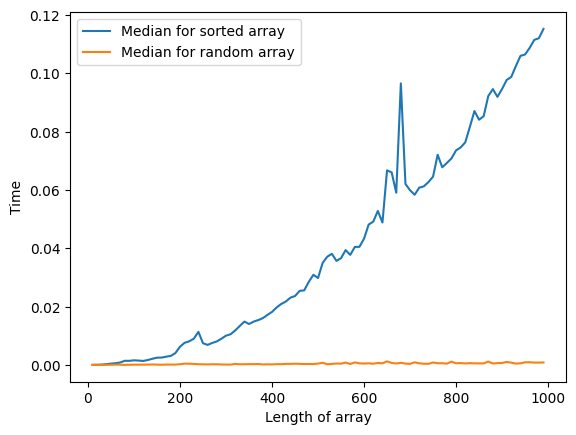

In [116]:
def plot_median():
    length_sorted = []
    length_random = []
    time_med = []
    time_med_random = []
    for i in range(1, 100):
        sorted_arr = [i for i in range(i*10)]
        random_arr = [random.randint(0, 10000) for _ in range(i*10)]
        len_arr = len(sorted_arr)
        length_sorted.append(len_arr)
        length_random.append(len(random_arr))
        begin = time.time()
        median(sorted_arr, 0, len_arr - 1)
        end = time.time()
        time_med.append(end - begin)
        begin = time.time()
        median(random_arr, 0, len(random_arr) - 1)
        end = time.time()
        time_med_random.append(end - begin)
    plt.plot(length_random, time_med, label = "Median for sorted array")
    plt.plot(length_random, time_med_random, label="Median for random array")
    plt.xlabel("Length of array")
    plt.ylabel("Time")
    plt.legend()
    plt.show()
plot_median()

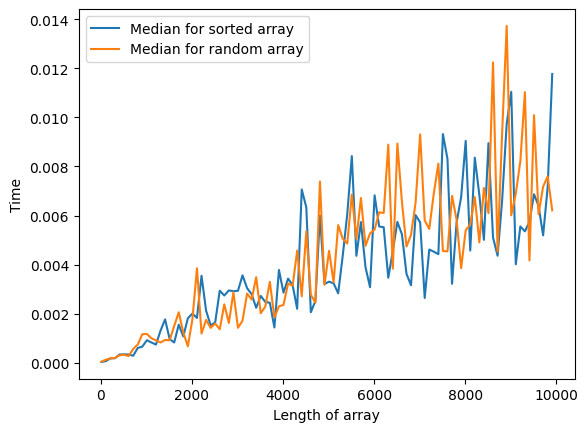

In [119]:
def plot_median_randomized():
    length_sorted = []
    length_random = []
    time_med = []
    time_med_random = []
    for i in range(1, 1000, 10):
        sorted_arr = [i for i in range(i*10)]
        random_arr = [random.randint(0, 10000) for _ in range(i*10)]
        len_arr = len(sorted_arr)
        length_sorted.append(len_arr)
        length_random.append(len(random_arr))
        begin = time.time()
        randomized_median(sorted_arr, 0, len_arr - 1)
        end = time.time()
        time_med.append(end - begin)
        begin = time.time()
        randomized_median(random_arr, 0, len(random_arr) - 1)
        end = time.time()
        time_med_random.append(end - begin)
    plt.plot(length_random, time_med, label = "Median for sorted array")
    plt.plot(length_random, time_med_random, label="Median for random array")
    plt.xlabel("Length of array")
    plt.ylabel("Time")
    plt.legend()
    plt.show()
plot_median_randomized()

Let's compare median as we made with k-th smallest

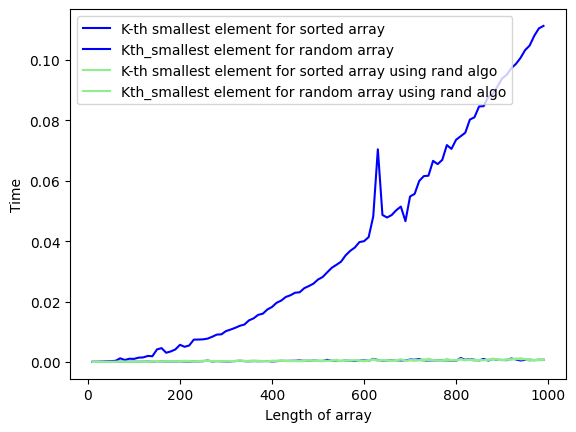

In [122]:
def comaprison_k_k_random():
    length_sorted = []
    length_random = []
    time_kth = []
    time_kth_random = []
    time_kth_for_random = []
    time_kth_rand_algo_rand_arr = []
    for i in range(1, 100):
        sorted_arr = [i for i in range(i*10)]
        random_arr = [random.randint(0, 10000) for _ in range(i*10)]
        len_arr = len(sorted_arr)
        length_sorted.append(len_arr)
        length_random.append(len(random_arr))
        begin = time.time()
        median(sorted_arr, 0, len_arr - 1)
        end = time.time()
        time_kth.append(end - begin)
        begin = time.time()
        median(random_arr, 0, len(random_arr) - 1)
        end = time.time()
        time_kth_random.append(end - begin)

        begin = time.time()
        randomized_median(sorted_arr, 0, len_arr - 1)
        end = time.time()
        time_kth_for_random.append(end - begin)
        begin = time.time()
        randomized_median(random_arr, 0, len(random_arr) - 1)
        end = time.time()
        time_kth_rand_algo_rand_arr.append(end - begin)

    plt.plot(length_random, time_kth, label = "K-th smallest element for sorted array", color="blue")
    plt.plot(length_random, time_kth_random, label="Kth_smallest element for random array", color="blue")
    plt.plot(length_random, time_kth_for_random, label = "K-th smallest element for sorted array using rand algo", color="lightgreen")
    plt.plot(length_random, time_kth_rand_algo_rand_arr, label="Kth_smallest element for random array using rand algo", color="lightgreen")
    plt.xlabel("Length of array")
    plt.ylabel("Time")
    plt.legend()
    plt.show()
comaprison_k_k_random()

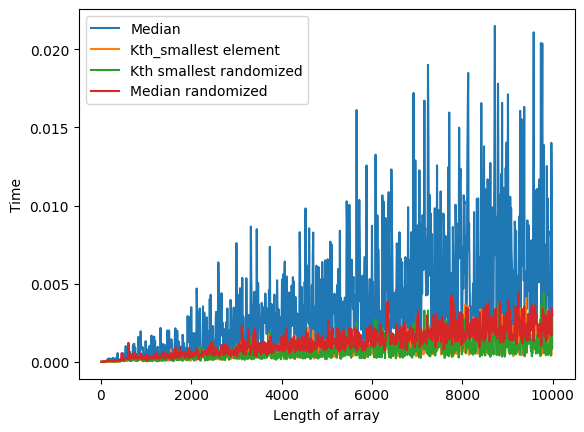

In [243]:
def plots():
    length_random = []
    time_med = []
    time_med_r = []
    time_med_for_random = []
    time_med_rand_for_rand = []
    for i in range(1, 1000):
        random_array = [random.randint(0, i**10) for _ in range(i*10)]
        sorted_array = [i for i in range(i*10)]
        len_arr = len(random_array)
        length_random.append(len_arr)
        # for j in range(10)
        begin = time.time()
        median(random_array, 0, len_arr - 1)
        end = time.time()
        time_med.append(end-begin)

        begin = time.time()
        randomized_median(random_array, 0, len_arr - 1, 3)
        end = time.time()
        time_med_r.append(end-begin)

        begin = time.time()
        median(random_array, 0, len_arr - 1)
        end = time.time()
        time_med_for_random.append(end-begin)

        begin = time.time()
        randomized_median(random_array, 0, len_arr - 1)
        end = time.time()
        time_med_rand_for_rand.append(end-begin)

    # fig, (ax1, ax2, ax3,) = plt.subplots(2)
    plt.plot(length_random, time_med_for_random, label = "Median")
    plt.plot(length_random, time_med, label="Kth_smallest element")
    plt.plot(length_random, time_med_r, label = "Kth smallest randomized")
    plt.plot(length_random, time_med_rand_for_rand, label = "Median randomized")
    plt.xlabel("Length of array")
    plt.ylabel("Time")
    plt.legend()
    plt.show()
plots()


Here you can see two functions of min, max more detailed. Above we use it as subcase of kth smallest
```
def smallest(array, left, right):
	index = partition(array, left, right)
	if (index - left == 0):
		return array[index]
	if (index - left > 0):
		return smallest(array, left, index - 1)
	return smallest(array, index + 1, right)
	
    
def biggest(array, left, right):

	index = partition(array, left, right)
	if (index - left == right-left):
			return array[index]
	if (index - left > right-left):
		return biggest(array, left, index - 1)
	return biggest(array, index + 1, right)
```

### 2.2 Quicksort

Now let's move on to the QuickSort algo. 
(For better readability, I copied some functions also here. For example partition.)

In [244]:
def partition(array, left, right):
	"""Standart quicksort partitioning

	Args:
		array (list): list of values
		left (int): index of left edge
		right (int): index of right edge

	Returns:
		int: index of pivot (after it has been replaced)
	"""
	x = array[right]
	i = left
	for j in range(left, right):
		if array[j] <= x:
			array[i], array[j] = array[j], array[i]
			i += 1
	array[i], array[right] = array[right], array[i]
	return i

In [125]:
def kthSmallest_index_find(array, left, right, k):
    """
    Function which finds the index of k_th smallest element.
    """
    if (k > 0 and k <= right - left + 1):
        index = partition(array, left, right)
        if (index - left == k - 1):
            return index
        if (index - left > k - 1):
            return kthSmallest_index_find(array, left, index - 1, k)
        return kthSmallest_index_find(array, index + 1, right, 
                            k - index + left - 1)
    return "Index out of bound"

In [126]:
def randomized_kthSmallest_index_find(array, left, right, k):
    """Function which finds the index of k_th smallest element.

    Args:
        array (list): array
        left (int): left edge of array
        right (int): right edge of array
        k (int): idex of which smallest

    Returns:
        int: index of kth smallest element.
    """
    if (k > 0 and k <= right - left + 1):
        index = randomized_partition(array, left, right)
        if (index - left == k - 1):
            return index
        if (index - left > k - 1):
            return randomized_kthSmallest(array, left, index - 1, k)
        return randomized_kthSmallest(array, index + 1, right, 
                            k - index + left - 1)
    return "Index out of bound"
# a = [10000 - i for i in range(10000)]


In [127]:
def median_index_find(array, left, right):
    """finds index of a median

    Args:
        array (list): array
        left (int): left edge of array
        right (int): right edge of array

    Returns:
        int: index of median.
    """
    return kthSmallest_index_find(array, left, right, len(array)//2 + 1)

In [128]:
def randomized_median_index_find(array, left, right):
    """finds index of a median using random pivot.

    Args:
        array (list): array
        left (int): left edge of array
        right (int): right edge of array

    Returns:
        int: index of median.
    """
    return randomized_kthSmallest_index_find(array, left, right, len(array)//2 + 1)

In [129]:
def quickSort(array, left, right):
    """Fixed position in the array (i.e. first element or middle)"""
    if left < right:
        index = partition(array, left, right)
        quickSort(array, left, index - 1)
        quickSort(array, index + 1, right)

In [130]:
def quickSort_determ_med(array, left, right):
	"""
	QuickSort using deterministic median of the array.
	"""
	median_index = median_index_find(array, left, right)
	array[right], array[median_index] = array[median_index], array[right]
	quickSort(array, left, right)

In [131]:
def quickSort_random_med(array, left, right):
	"""
	QuickSort using "random" median of the array.
	"""
	median_index =randomized_median_index_find(array, left, right)
	array[right], array[median_index] = array[median_index], array[right]
	quickSort(array, left, right)

In [133]:
def randomized_quickSort(array, left, right):
    """Randomized Quicksort

    Args:
        array (list): array to sort
        left (int): index of left edge
        right (int): index of right edge
    """
    if left < right:
        index = randomized_partition(array, left, right)
        randomized_quickSort(array, left, index - 1)
        randomized_quickSort(array, index + 1, right)

3) Derive the time complexity:
a)  Worst - The same as in quickSelect the worst case will be $O(n^2)$ as we always divide it to $n$ and $n - 1$.
    Best - Quicksort's best case occurs when the partitions are as evenly balanced as possible: their sizes either are equal or are within 1 of each other. The former case occurs if the subarray has an odd number of elements and the pivot is right in the middle after partitioning, and each partition has $\frac{(n-1)}{2}$ elements. The latter case occurs if the subarray has an even number $n$ of elements and one partition has $\frac{n}{2}$ elements with the other having $\frac{n}{2} - 1$. In either of these cases, each partition has at most $\frac{n}{2}$ and the tree of subproblem sizes looks a lot like the tree of subproblem sizes for merge sort, with the partitioning times looking like the merging times. So in best case partition + union = $O(nlog(n))$\
b)\
c)\
d)$X = \sum_{i=1}^{n} \sum_{j=i+1}^{n}X_{ij}$ <br />

$E[X] = \sum_{i=1}^{n} \sum_{j=i+1}^{n}E[X_{ij}]$

$E[X] = \sum_{i=1}^{n} 2 \cdot (\frac{1}{2} + \frac{1}{3} + \frac{1}{4} + \frac{1}{5} + ... + \frac{1}{n - i + 1})$ <br />
The sequence $\frac{1}{2} + \frac{1}{3} + \frac{1}{4} + \frac{1}{5} + ... + \frac{1}{n}$ is called harmonic and it belongs to the range $[\ln(n), \ln(n)+1]$, so <br />

$E[X] \le 2 \cdot n \cdot ln(n)$\
\

e)Now let's assume that the hypothesis is correct for all $i \le k - 1$ and prove that it is also correct for all $i = k$.
$T(k) = k - 1 + \frac{2}{k} \sum_{i=1}^{k-1}T(i) \le k - 1 + \frac{2}{k} \sum_{i=1}^{k-1}2 \cdot i \cdot ln(i) \le k - 1 + \frac{2}{k} \int_{1}^{k}(2 \cdot x \cdot ln(x))dx = k - 1 + \frac{2}{k} [k^2 \cdot \ln(k) - \frac{k^2}{2} + \frac{1}{2}] = 2 \cdot k \cdot ln(k) - 1 + \frac{1}{k} \le 2 \cdot k \cdot ln(k)$
<br />
Hence, the hypothesis is true for all i and $T(n) \le 2 \cdot n \cdot ln(n)$




In [135]:
def check_for_different_values():
        sorted_array = [i for i in range(100)]
        reversed_sorted_array = [100 - i for i in range(100)]
        random_array = [random.randint(0, 100) for _ in range(100)]
        sorted_array_time = []
        reversed_sorted_array_time = []
        random_array_time = []
        lst1 = [sorted_array, reversed_sorted_array, random_array]
        lst = [sorted_array_time, reversed_sorted_array_time, random_array_time]
        for i in range(3):
                begin = time.time()
                quickSort(lst1[i], 0, len(lst1[i]) - 1)
                end = time.time()
                lst[i].append(end-begin)

                begin = time.time()
                quickSort_determ_med(lst1[i], 0, len(lst1[i]) - 1)
                end = time.time()
                lst[i].append(end-begin)

                begin = time.time()
                quickSort_random_med(lst1[i], 0, len(lst1[i]) - 1)
                end = time.time()
                lst[i].append(end - begin)

                begin = time.time()
                randomized_quickSort(lst1[i], 0, len(lst1[i]) - 1)
                end = time.time()
                lst[i].append(end-begin)
        

        df=pd.DataFrame({"Sorted array":lst[0],
                        "Reversed sorted array":lst[1], "Random array": lst[2]})

        df.index = ["quicksort", "quicksort determ. med.", "quicksort random med.", "Randomized quicksort"]
        return df


check_for_different_values()

,Sorted array,Reversed sorted array,Random array
quicksort,0.001385,0.000994,0.000410
quicksort determ. med.,0.001941,0.001770,0.003601
quicksort random med.,0.001667,0.003258,0.002490
Randomized quicksort,0.000470,0.000970,0.000589


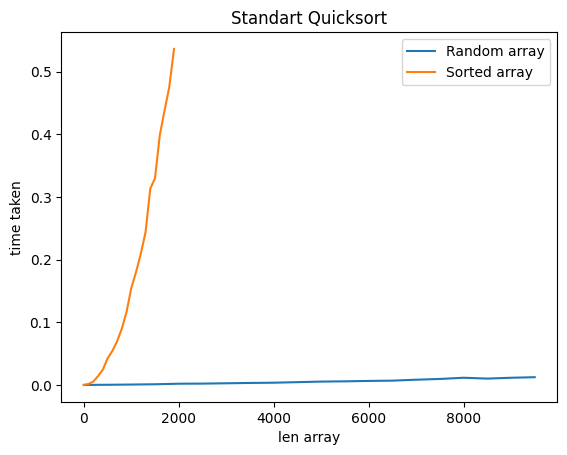

In [137]:
def plot_quicksort():
    time_quicksort_sorted = []
    lengths_sorted = []
    time_quicksort_random = []
    lengths_random = []
    for i in range( 20):
        sorted_array = [i for i in range( i*100)]
        random_array = [random.randint((i-1)*100, i*100) for _ in range(i*500)]
        lengths_sorted.append(len(sorted_array))
        lengths_random.append(len(random_array))
        begin = time.time()
        quickSort(sorted_array, 0, len(sorted_array)-1)
        end = time.time()
        time_quicksort_sorted.append(end - begin)
        begin = time.time()
        quickSort(random_array, 0 , len(sorted_array)-1)
        end = time.time()
        time_quicksort_random.append(end - begin)

    plt.plot(lengths_random, time_quicksort_random, label="Random array")
    plt.plot(lengths_sorted, time_quicksort_sorted, label = "Sorted array")
    plt.legend()
    plt.xlabel("len array")
    plt.ylabel("time taken")
    plt.title("Standart Quicksort")
    plt.show()
plot_quicksort()

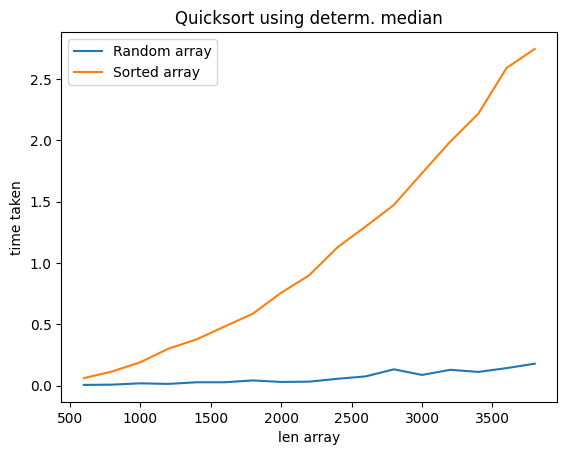

In [138]:
def plot_quicksort():
    time_quicksort_sorted = []
    lengths_sorted = []
    time_quicksort_random = []
    lengths_random = []
    for i in range(3, 20):
        sorted_array = [i for i in range( i*200)]
        random_array = [random.randint((i-1)*100, i*100) for _ in range(i*200)]
        lengths_sorted.append(len(sorted_array))
        lengths_random.append(len(random_array))
        begin = time.time()
        quickSort_determ_med(sorted_array, 0, len(sorted_array)-1)
        end = time.time()
        time_quicksort_sorted.append(end - begin)
        begin = time.time()
        quickSort_determ_med(random_array, 0 , len(random_array)-1)
        end = time.time()
        time_quicksort_random.append(end - begin)

    plt.plot(lengths_random, time_quicksort_random, label="Random array")
    plt.plot(lengths_sorted, time_quicksort_sorted, label = "Sorted array")
    plt.legend()
    plt.xlabel("len array")
    plt.ylabel("time taken")
    plt.title("Quicksort using determ. median")

    plt.show()
plot_quicksort()

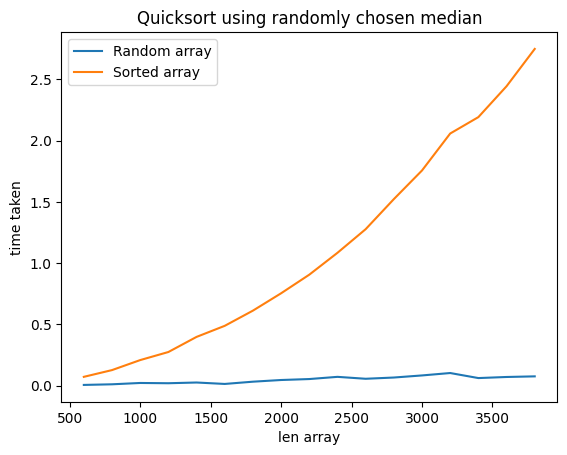

In [139]:
def plot_quicksort():
    time_quicksort_sorted = []
    lengths_sorted = []
    time_quicksort_random = []
    lengths_random = []
    for i in range(3, 20):
        sorted_array = [i for i in range( i*200)]
        random_array = [random.randint((i-1)*100, i*100) for _ in range(i*200)]
        lengths_sorted.append(len(sorted_array))
        lengths_random.append(len(random_array))
        begin = time.time()
        quickSort_random_med(sorted_array, 0, len(sorted_array)-1)
        end = time.time()
        time_quicksort_sorted.append(end - begin)
        begin = time.time()
        quickSort_random_med(random_array, 0 , len(random_array)-1)
        end = time.time()
        time_quicksort_random.append(end - begin)

    plt.plot(lengths_random, time_quicksort_random, label="Random array")
    plt.plot(lengths_sorted, time_quicksort_sorted, label = "Sorted array")
    plt.legend()
    plt.xlabel("len array")
    plt.ylabel("time taken")
    plt.title("Quicksort using randomly chosen median")
    plt.show()
plot_quicksort()

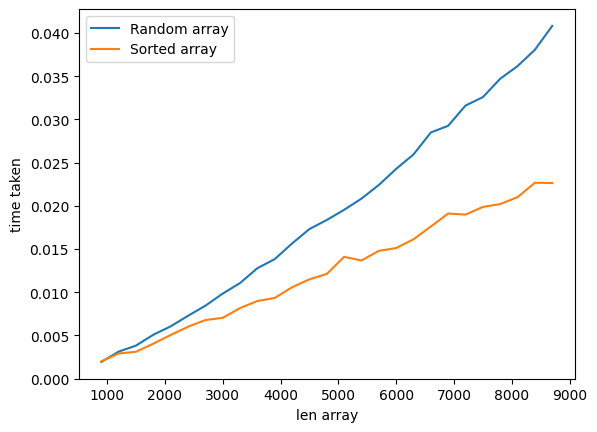

In [284]:
def plot_quicksort():
    time_quicksort_sorted = []
    lengths_sorted = []
    time_quicksort_random = []
    lengths_random = []
    for i in range(3, 30):
        sorted_array = [i for i in range( i*300)]
        random_array = [random.randint((i-1)*300, i*300) for _ in range(i*300)]
        lengths_sorted.append(len(sorted_array))
        lengths_random.append(len(random_array))
        begin = time.time()
        randomized_quickSort(sorted_array, 0, len(sorted_array)-1)
        end = time.time()
        time_quicksort_sorted.append(end - begin)
        begin = time.time()
        randomized_quickSort(random_array, 0 , len(random_array)-1)
        end = time.time()
        time_quicksort_random.append(end - begin)

    plt.plot(lengths_random, time_quicksort_random, label="Random array")
    plt.plot(lengths_sorted, time_quicksort_sorted, label = "Sorted array")
    plt.legend()
    plt.xlabel("len array")
    plt.ylabel("time taken")
    plt.title("Randomized Quicksort")
    plt.show()
plot_quicksort()

Here lets compare each algorithm for sorted array:

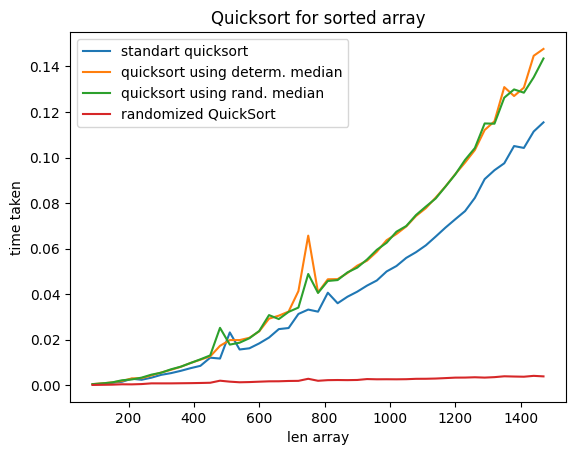

In [144]:
def plot_quicksort():
    time_for_stand_quicksort = []
    time_for_determ_med_quicksort = []
    time_for_random_med_quicksort = []
    time_for_randomized_quicksort = []
    
    lengths = []


    for i in range(3, 50):
        sorted_array = [i for i in range( i*30)]
        lengths.append(len(sorted_array))
        begin = time.time()
        quickSort(sorted_array, 0, len(sorted_array)-1)
        end = time.time()
        time_for_stand_quicksort.append(end - begin)
        
        begin = time.time()
        quickSort_determ_med(sorted_array, 0 , len(sorted_array)-1)
        end = time.time()
        time_for_determ_med_quicksort.append(end - begin)

        begin = time.time()
        quickSort_random_med(sorted_array, 0 , len(sorted_array)-1)
        end = time.time()
        time_for_random_med_quicksort.append(end - begin)

        begin = time.time()
        randomized_quickSort(sorted_array, 0 , len(sorted_array)-1)
        end = time.time()
        time_for_randomized_quicksort.append(end - begin)
        

    plt.plot(lengths, time_for_stand_quicksort, label="standart quicksort")
    plt.plot(lengths, time_for_determ_med_quicksort, label = "quicksort using determ. median")
    plt.plot(lengths, time_for_random_med_quicksort, label = "quicksort using rand. median")
    plt.plot(lengths, time_for_randomized_quicksort, label = "randomized QuickSort")

    plt.legend()
    plt.xlabel("len array")
    plt.ylabel("time taken")
    plt.title("Quicksort for sorted array")
    plt.show()
plot_quicksort()

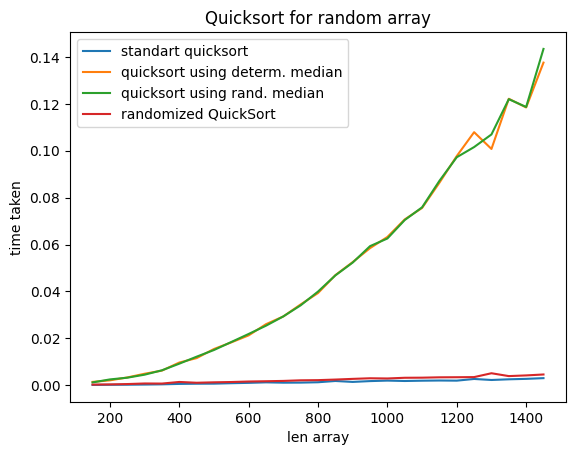

In [148]:
def plot_quicksort():
    time_for_stand_quicksort = []
    time_for_determ_med_quicksort = []
    time_for_random_med_quicksort = []
    time_for_randomized_quicksort = []
    
    lengths = []


    for i in range(3, 30):
        random_array = [random.randint((i-1)*300, i*300) for _ in range(i*50)]
        lengths.append(len(random_array))
        begin = time.time()
        quickSort(random_array, 0, len(random_array)-1)
        end = time.time()
        time_for_stand_quicksort.append(end - begin)
        
        begin = time.time()
        quickSort_determ_med(random_array, 0 , len(random_array)-1)
        end = time.time()
        time_for_determ_med_quicksort.append(end - begin)

        begin = time.time()
        quickSort_random_med(random_array, 0 , len(random_array)-1)
        end = time.time()
        time_for_random_med_quicksort.append(end - begin)

        begin = time.time()
        randomized_quickSort(random_array, 0 , len(random_array)-1)
        end = time.time()
        time_for_randomized_quicksort.append(end - begin)
        

    plt.plot(lengths, time_for_stand_quicksort, label="standart quicksort")
    plt.plot(lengths, time_for_determ_med_quicksort, label = "quicksort using determ. median")
    plt.plot(lengths, time_for_random_med_quicksort, label = "quicksort using rand. median")
    plt.plot(lengths, time_for_randomized_quicksort, label = "randomized QuickSort")

    plt.legend()
    plt.xlabel("len array")
    plt.ylabel("time taken")
    plt.title("Quicksort for random array")
    plt.show()
plot_quicksort()